# Tema: Covid-19 en Ecuador

## Formulación del Problema
El problema en cuestión es analizar la infección del Covid-19 en Ecuador, como este se fue propagando a nivel nacional hasta el dia de hoy. Con la simulación esperamos plantear una ecuación que deterine como ha sido el crecimiento de los infectados durante el transcurso de la pandemia a dia de hoy. Vamos a experimentar con un dataset que lleva los datos del covid-19 a nivel mundial del cual vaos a extraer los datos de ecuador de numero de infectados y muertos para trabajar.

## Definición del sistema
Se pretende simular como se dieron los contagios y muertes en el pais desde el dia 1 que fue el 1 de marzo 2020 cuando empezo en Ecuador. Queremos determinar la ecuación que represente los datos.

## Formulación del modelo
Para formular el modelo tomamos datos reales de los infectados y muertos por Covid-19 en Ecuador. Se tomaran datos solo de cifras relacionadas a los contagios y las muertes dadas hasta la fecha.Para obtener la ecuación deseado aplicaremos los modelos de Regresión Lineal y Regresión Logarítmica.

## Colección de datos
Los datos para trabajar son mediciones obtenidas en el sistema real de todos los países del mundo, donde se encuentra todas la variables relacionadas con el covid-19.

## Implementación del modelo en el ordenador
Para hacer la simulación utilizaremos el lenguaje de programación Python cn librerias especificas que nos permitiran realizar el proceso de forma más rápida. Las liberías son: Pandas, Numpy, Sklearn.

In [19]:
# Implementar Covid-19 Regresión Lineal
import numpy as np #Librería numérica
import matplotlib.pyplot as plt # Para crear gráficos con matplotlib
#%matplotlib inline # Si quieres hacer estos gráficos dentro de un jupyter notebook
from sklearn.linear_model import LinearRegression #Regresión Lineal con scikit-learn
import pandas as pd
from datetime import datetime,timedelta
import matplotlib.pyplot as plt
%matplotlib inline

def f(x):  # función f(x) = 0.1*x + 1.25 + 0.2*Ruido_Gaussiano
    np.random.seed(42) # para poder reproducirlo
    y = 0.1*x + 1.25 + 0.2*np.random.randn(x.shape[0])
    return y

df = pd.read_csv('owid-covid-data.csv').fillna(0) # poniendo datos nan a cero
ndf= df.loc[(df['location'] == 'Ecuador') & (df['total_cases'] != 0)] # filtrando por pais y no ceros 
ndf1=ndf[['date','total_cases','total_deaths']]
x=np.arange(1,len(ndf1)+1,1) # arreglo de x lo creo para simular el numero del dia y el numero de casos
y=np.array(ndf1.values[:,1])
y1=np.array(ndf1.values[:,2])

In [22]:
regresion_lineal = LinearRegression() # creamos una instancia de LinearRegression
# instruimos a la regresión lineal que aprenda de los datos (x,y)
regresion_lineal.fit(x.reshape(-1,1), y) 

w = 729.6465842394807, b = -19722.37710437714
y = 729.6465842394807x -19722.37710437714


## Verificación
Se realizo la prueba de los modelos con ejemplos propuestos por las liberías que se nombraron anteriormente para ver la funcionalidad correcta del modelo.

## Diseño de experimentos
Para esto solo probaremos con los datos relacionados a contagios y muertes en el contexto del covid-19 en Ecuador. No abrá muchas simulaciones son son dos una ara los contagios y otra para las muertes y al estar menos de un año en Ecuador el Covid-19 no son muchos datos por lo que la implemtación el casi al instante.

## Experimentación
Aquí pondremos a prueba el modelo que definimos de Regresión Lineal y Regresión Logarítmica con la implementación en Python.

In [23]:
# vemos los parámetros que ha estimado la regresión lineal
print('w = ' + str(regresion_lineal.coef_[0]) + ', b = ' + str(regresion_lineal.intercept_))
# resultado: w = [0.09183522], b = 1.2858792525736682
if (regresion_lineal.intercept_ < 0):
    ecua='y = {}x {}'
else:
    ecua='y = {}x + {}'
print(ecua.format(regresion_lineal.coef_[0],regresion_lineal.intercept_))

w = 729.6465842394807, b = -19722.37710437714
y = 729.6465842394807x -19722.37710437714


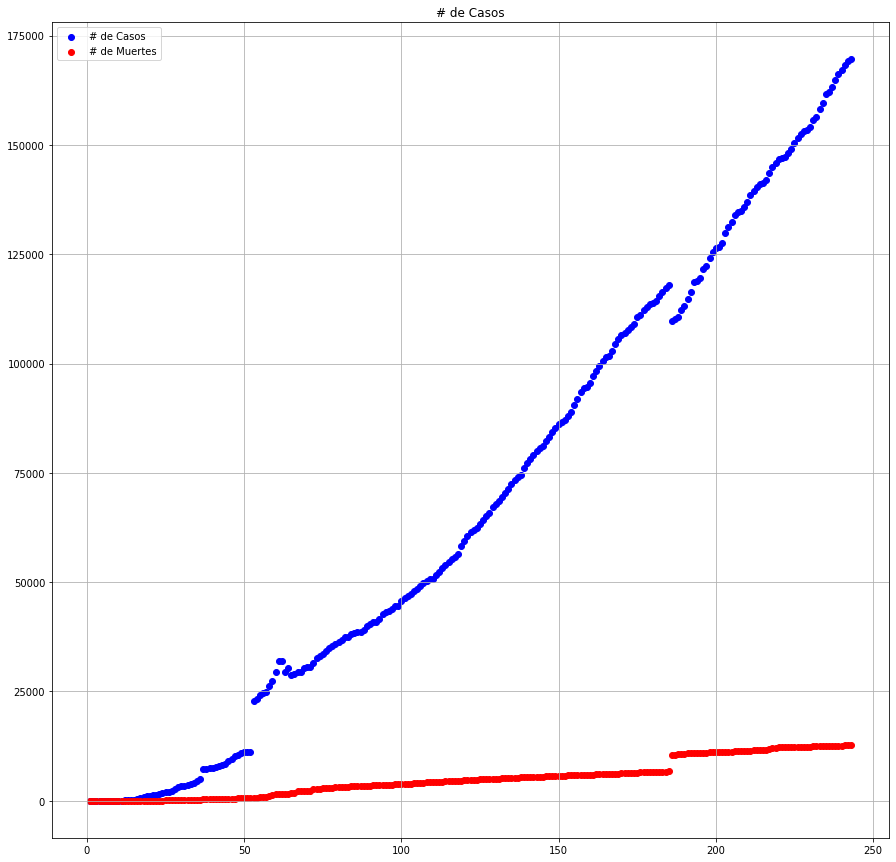

In [18]:
plt.figure(figsize=(15, 15))
plt.scatter(x,y,label='# de Casos', color='blue')
plt.scatter(x,y1,label='# de Muertes', color='red')
plt.grid(True)
plt.legend()
plt.title('# de Casos');

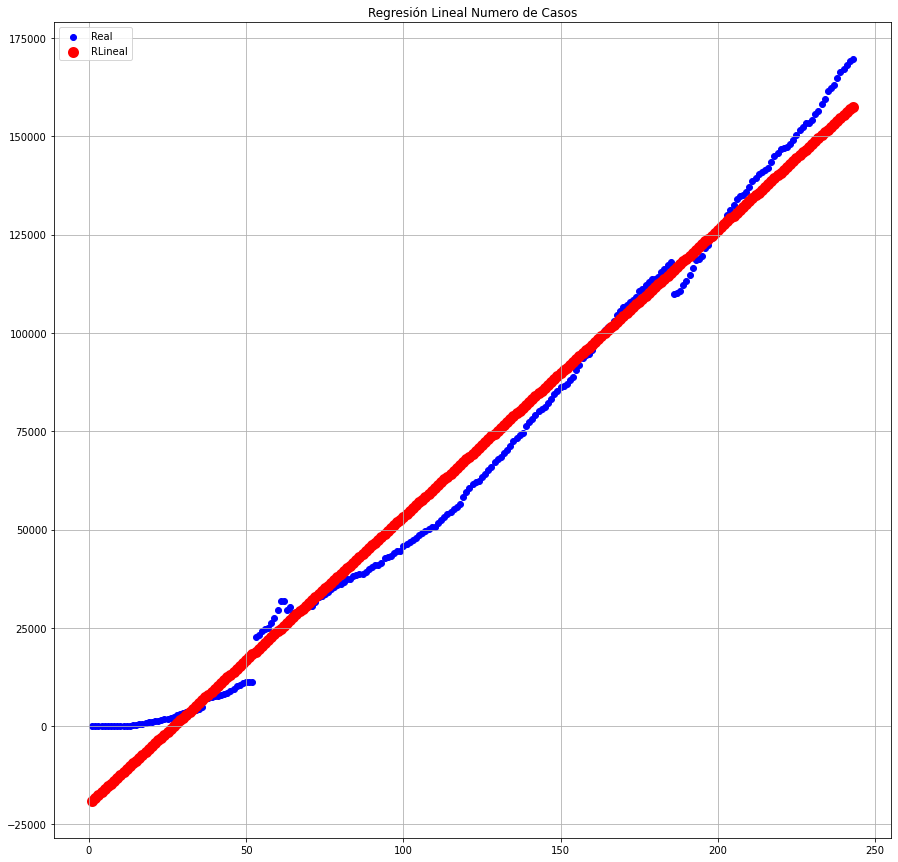

In [25]:
fun= lambda num: regresion_lineal.coef_[0]*num+regresion_lineal.intercept_
plt.figure(figsize=(15, 15))
plt.scatter(x,y,label='Real', color='blue')
plt.grid(True)
plt.title('Regresión Lineal Numero de Casos');
x1=np.arange(1,len(ndf1)+1,1)
plt.scatter(x1,fun(x1),color='red',linewidth=5.0,label='RLineal')
plt.legend()
plt.show()

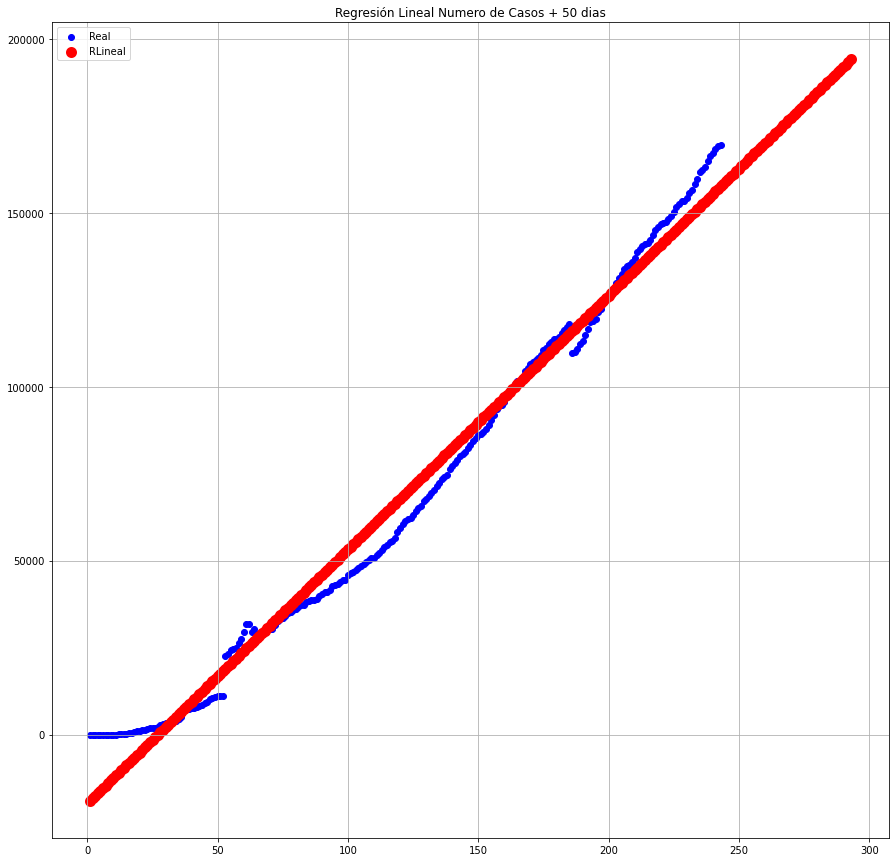

In [26]:
plt.figure(figsize=(15, 15))
plt.scatter(x,y,label='Real', color='blue')
plt.grid(True)
plt.title('Regresión Lineal Numero de Casos + 50 dias');
x1=np.arange(1,len(ndf1)+51,1)
plt.scatter(x1,fun(x1),color='red',linewidth=5.0,label='RLineal')
plt.legend()
plt.show()

In [27]:
from scipy.optimize import curve_fit
from sklearn.linear_model import LogisticRegression
def modelo_logistico(x,a,b):
    return a+b*np.log(x)

exp_fit = curve_fit(modelo_logistico,x,y) #Extraemos los valores de los paramatros
exp_fit1 = curve_fit(modelo_logistico,x,y1) #Extraemos los valores de los paramatros

print(exp_fit)
print("")
print(exp_fit1)

(array([-132282.15628488,   44713.86100596]), array([[ 79233323.69668128, -16815968.22047479],
       [-16815968.22047479,   3730128.57348377]]))

(array([-10481.82124408,   3486.39542592]), array([[ 604709.26516529, -128339.5842676 ],
       [-128339.5842676 ,   28468.36684504]]))


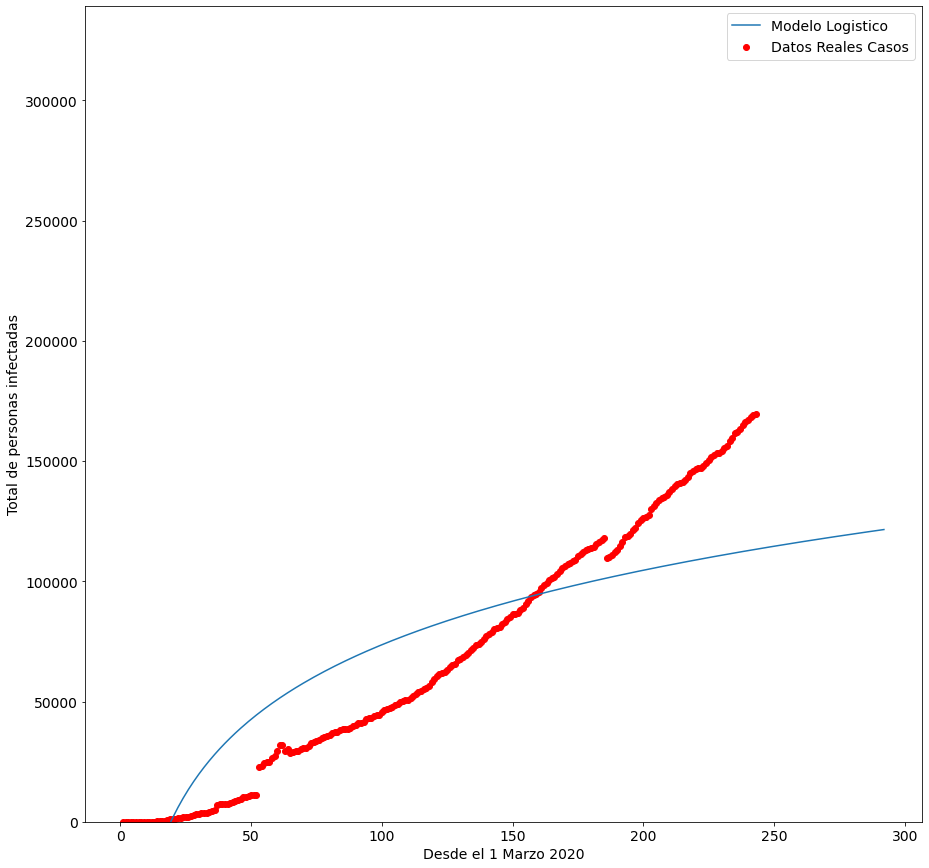

In [28]:
pred_x = list(range(min(x),max(x)+50)) # Predecir 50 dias mas
plt.rcParams['figure.figsize'] = [15, 15]
plt.rc('font', size=14)
# Real data
plt.scatter(x,y,label="Datos Reales Casos",color="red")
# Predicted exponential curve
plt.plot(pred_x, [modelo_logistico(i,exp_fit[0][0],exp_fit[0][1]) for i in pred_x], label="Modelo Logistico" )
plt.legend()
plt.xlabel("Desde el 1 Marzo 2020")
plt.ylabel("Total de personas infectadas")
plt.ylim(0,max(y)*2) # Definir los limites de Y
plt.show()

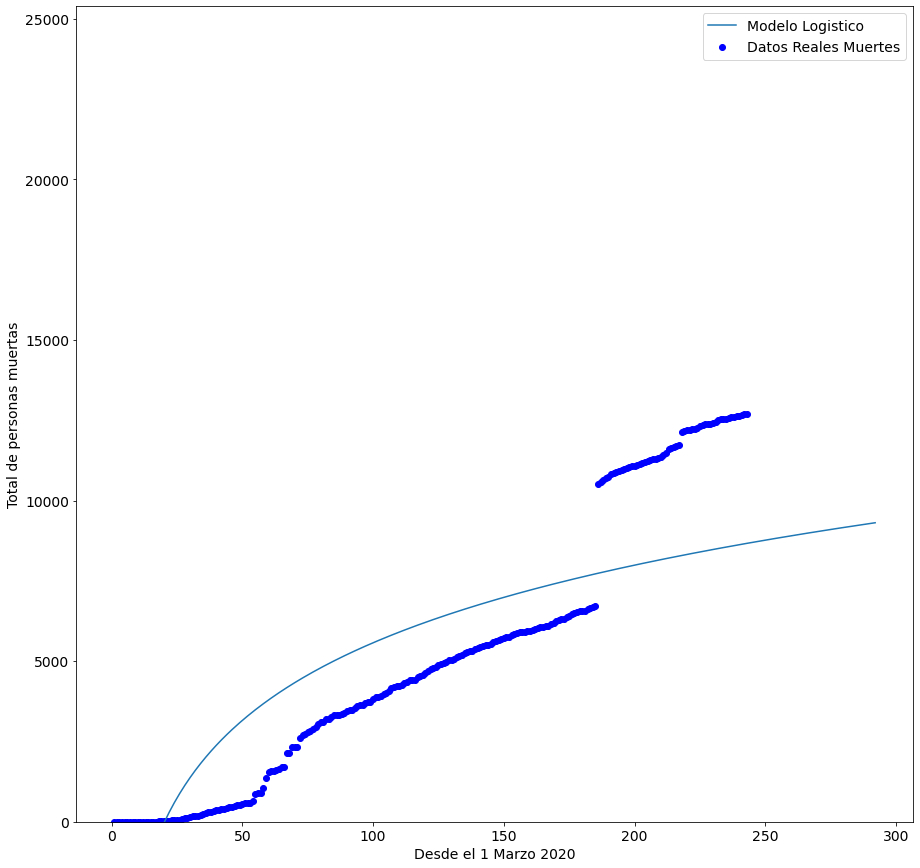

In [29]:
plt.scatter(x,y1,label="Datos Reales Muertes",color="blue")
plt.plot(pred_x, [modelo_logistico(i,exp_fit1[0][0],exp_fit1[0][1]) for i in pred_x], label="Modelo Logistico" )
plt.legend()
plt.xlabel("Desde el 1 Marzo 2020")
plt.ylabel("Total de personas muertas")
plt.ylim(0,max(y1)*2) # Definir los limites de Y
plt.show()

## Interpretación
Como se puede ver la Regresión Lineal representa un modelo muy acercado a la realidad dando una ecuación con un error muy bajo, comparado con la logaritmica que no se nota una ecuación muy acercada a la realidad.Pero como digo, cada tipo de regresión se aplica mejor según el tipo de problema.

## Implementación
Es el metodo para las dos Regresiones establecidas para resolver el problema.

## Documentación
<ul>
    
<li>[1] D. Quisi, "Simulación Python", GitHub, 2020. [Online]. Habilitado: https://github.com/dquisi/SimulacionPython/blob/master/RegresionTotal.ipynb. [Accessed: 01- Nov- 2020].</li>

<li>[2]J. Heras, "Regresión Lineal: teoría y ejemplos en Python - IArtificial.net", IArtificial.net, 2020. [Online]. Available: https://www.iartificial.net/regresion-lineal-con-ejemplos-en-python/. [Accessed: 01- Nov- 2020].</li>
    </ul>